<a href="https://colab.research.google.com/github/ssallonni/DiabetesDataset/blob/main/TeamProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Saloni Sharma ss223472
# Siddarth Rayapur sdr2796

#**Project Description**

## **Introduction:**
Access to quick, inexpensive medical diagnostics is a major problem in many regions of the world, particularly in those where healthcare is privatized. Diabetes is a common chronic illness that needs to be managed closely from the beginning to avoid serious consequences. However, delayed diagnosis is frequently the result of high costs and restricted availability of routine medical examinations, especially for those living in underprivileged neighborhoods. This study aims to address the problem of limited access to affordable and timely medical diagnostics by creating multiple predictive algorithms that evaluate the risk of diabetes using easily accessible medical and demographic data. Our goal is to identify an algorithm that best offers a practical and cost-effective method to identify individuals at high risk of diabetes by focusing on the impacts of Body Mass Index (BMI) on diabetes outcomes, insulin levels, and glucose levels. This approach not only enhances early detection but also empowers individuals to proactively manage their health, leading to improved overall health outcomes and reduced strain on healthcare systems.

## **Problem Statement:**
This research aims to create multiple predictive algorithms that evaluate the risk of diabetes using easily accessible medical and demographic data. We hope to find an algorithm that can best offer a practical and affordable way to identify those who are at high risk of diabetes by concentrating on the relationship between BMI, Insulin levels, and glucose levels.

## **Research Question:**
What are the impacts of BMI on diabetes outcomes, insulin, and glucose levels, and which predictive model best demonstrates the strength of these relationships?

## **Hypothesis:**
Higher BMI is associated with higher glucose levels and insulin resistance, leading to an increased likelihood of diabetes. By analyzing these interactions, we can create a predictive model to identify high-risk individuals.

## **Dataset Description:**
Our dataset was sourced from the diabetes dataset on Kaggle and the The file we downloaded and used was diabetes.csv. Our Diabetes dataset holds various numerical values used to study indicators and outcomes.
https://www.kaggle.com/datasets/mathchi/diabetes-data-set


# **Part 1: Downloading the Dataser and Pre-Processing**

In [ ]:
# import necessary packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
import sklearn
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.gaussian_process.kernels import RBF
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
# load the Diabetes dataset
diabetes =  pd.read_csv("diabetes_data.csv")

# view dataset head
diabetes.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# obtain descriptive statistics for feature columns to determine outliers
diabetes.describe()[["Pregnancies","Glucose","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,99.000000,846.000000,67.100000,2.420000,81.000000


#Pre-processing:
We started the preprocessing of the data by eliminating null values and duplicates. Our features and labels were all quantitative, thus one-hot encoding was not required. Since a robust scaler is less susceptible to outliers than a standard scaler and a min-max scaler, we decided to use it instead. By using this method, we were able to preserve the original range of our data, which led to more accurate outcomes from our several machine learning models.


In [ ]:
# drop duplicates and na values
diabetes = diabetes.drop_duplicates()
diabetes = diabetes.dropna()

In [ ]:
# create feature df and label df
diabetes_features = diabetes[["Pregnancies","Glucose","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]
diabetes_label = diabetes[["Outcome"]]

In [ ]:
# use Robust Scaler to scale features
scaler = RobustScaler()
diabetes_features_scaled = scaler.fit_transform(diabetes_features.to_numpy())
diabetes_features_scaled = pd.DataFrame(diabetes_features_scaled, columns=[["Pregnancies","Glucose","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])
diabetes_features_scaled.head()

,Pregnancies,Glucose,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.6,0.751515,0.37500,-0.239686,0.172043,0.665359,1.235294
1,-0.4,-0.775758,0.18750,-0.239686,-0.580645,-0.056209,0.117647
2,1.0,1.600000,-0.71875,-0.239686,-0.935484,0.783007,0.176471
3,-0.4,-0.678788,0.00000,0.499018,-0.419355,-0.537255,-0.470588
4,-0.6,0.484848,0.37500,1.080550,1.193548,5.007843,0.235294


# **Part 2: Splitting our Data and Implementing the Models**

In [ ]:
# Create Test/Train
X_train, X_test, y_train, y_test = train_test_split(diabetes_features_scaled, diabetes_label, test_size=0.2, random_state=42)

We first divided the dataset into training and testing sets using an 80-20 split in order to evaluate the model's prediction power.

#**Linear Regression Model**

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.7597402597402597
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



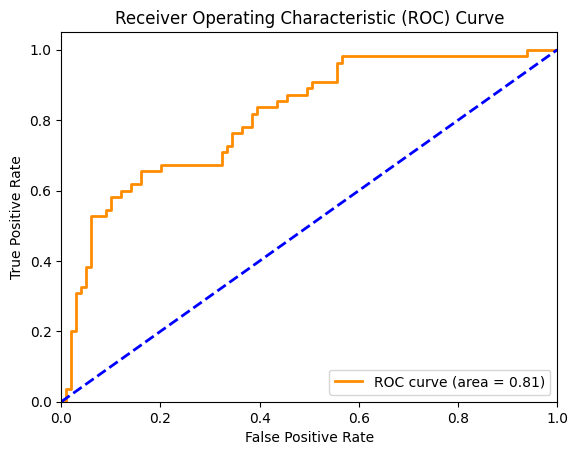

In [ ]:
 # add your code here
model = LogisticRegression(C=0.5)
model.fit(X_train,y_train)

predictions = model.predict(X_test)
#  Classification Report
print('Accuracy', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
from sklearn.metrics import roc_curve, auc

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color = 'darkorange', lw = 2, label = f'ROC curve (area = {roc_auc:0.2f})')
plt.plot([0, 1], [0, 1], color = 'blue', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc = "lower right")
plt.show()


# Assessment of the LR Model:
To predict the outcomes of diabetes, we trained a Logistic Regression model with a regularization parameter C set to 0.5. In order to prevent overfitting, this parameter regulates how much regularization is given to the model; a lower value indicates more regularization. With an accuracy of 75.97%, the model was able to generate predictions on the test data after being trained on the training set. The precision for class 0 (non-diabetic patients) was 0.81, meaning that 81% of the anticipated cases were accurately classified as non-diabetic. The precision was lower for class 1 (diabetic individuals) at 0.67, indicating that 67% of the projected instances of diabetes were accurately diagnosed. Recall scores for class 0 and class 1 were 0.82 and 0.65, respectively. This indicates that 82% of real cases that were not diabetic and 65% of real patients that were diabetic were correctly classified by the model.
The model performs consistently in both classes, as indicated by the weighted average F1-score of 0.76, which takes precision and recall into account. The class 1 recall and precision data, however, point to a major need for improvement. It may be because of the dataset's inherent imbalance or the difficulty of identifying diabetes cases using the variables provided that the model tends to do better at predicting non-diabetic cases than diabetic ones.Additional steps that could be taken to improve the model's prediction power, particularly for class 1, include modifying the regularization parameter, investigating other feature selection strategies, or integrating more sophisticated approaches like ensemble learning. These actions could lead to more balanced performance in both classes and enhance the model's overall accuracy and dependability in forecasting the course of diabetes.
# Graph
The Logistic Regression model's ROC (Receiver Operating Characteristic) curve sheds light on how well the model can differentiate between patients with and without diabetes. Plotting the True Positive Rate (TPR) or recall against the False Positive Rate (FPR) at various threshold values is what the curve represents. With an area under the ROC curve (AUC) of 0.81, the Logistic Regression model seems to be able to distinguish between the two groups very well. An AUC of 1 would indicate a flawless model, whereas the diagonal line would indicate an AUC of 0.5 for a model lacking discriminative capacity. With a greater TPR and a lower FPR, the ROC curve is far above this diagonal line, indicating that the Logistic Regression classifier works well in properly classifying cases that are diabetic and those that are not.

#**SVC (Linear Kernel) Model**

In [ ]:
# add your code here
model = SVC(kernel = 'linear')
model.fit(X_train,y_train)

predictions = model.predict(X_test)

#  Classification Report
print('Accuracy', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 0.7597402597402597
              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Assessment of the SVC, with a Linear Kernel, Model:
We used a linear kernel Support Vector Classifier (SVC) to forecast diabetes outcomes. 80% of the dataset was used to train the model, while the remaining 20% was used to assess it. The accuracy of the SVC was 75.97%. The recall for class 0 (non-diabetic cases) was 0.82, whereas the recall for class 1 (diabetic cases) was 0.65, per the classification report. Class 0 precision was 0.81, whereas class 1 precision was 0.67. With a weighted average F1-score of 0.76, which indicates balanced performance across both classes, the model performs well overall. But when it comes to predicting cases other than diabetes, it does better. Similar efficacy is suggested by the SVC's performance, which is comparable to that of the Logistic Regression model. However, more fine-tuning is required to increase the model's prediction ability for patients with diabetes; this may entail changing the kernel parameters or looking at different feature selection strategies.

#**SVC (Default Kernel) Model**

In [ ]:
# add your code here
model = SVC()
model.fit(X_train,y_train)

predictions = model.predict(X_test)

#  Classification Report
print('Accuracy', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 0.7597402597402597
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.69      0.60      0.64        55

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.73       154
weighted avg       0.75      0.76      0.76       154



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#Assessment of The SVC, with a default Kernel, model:
To predict the outcomes of diabetes, we used a Support Vector Classifier (SVC) with the standard Radial Basis Function (RBF) kernel. With an accuracy of 75.97%, the model was assessed using test data after being trained on training data. The recall values for class 0 (non-diabetic cases) and class 1 (diabetic cases) were 0.85 and 0.60, respectively, according to the classification report, while the precision values were 0.79 for class 0 and 0.69 for class 1. With a weighted average F1-score of 0.76, which indicates balanced performance, the model did well overall. On the other hand, the model performs better in predicting non-diabetic cases than diabetic cases. The efficiency of the SVC with the RBF kernel is comparable to that of previous models, indicating that further feature engineering and optimization are required to raise prediction accuracy, particularly for individuals with diabetes.


#**K-Nearest Neighbors Model**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# add your code here
model = KNeighborsClassifier(n_neighbors=6)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

#  Classification Report
print('Accuracy', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

Accuracy 0.7077922077922078
              precision    recall  f1-score   support

           0       0.73      0.87      0.79        99
           1       0.64      0.42      0.51        55

    accuracy                           0.71       154
   macro avg       0.68      0.64      0.65       154
weighted avg       0.70      0.71      0.69       154



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#Assessment of K-Nearest Neighbors Model:
Using a K-Nearest Neighbors (KNN) classifier with 𝑘=6, we were able to predict the outcomes of diabetes with a 70.78% accuracy rate. According to the classification report, the precision values for class 0 and class 1 are 0.73 and 0.64, respectively, while the recall values are 0.87 for class 0 (non-diabetic cases) and 0.42 for class 1 (diabetic cases). The model appears to be more successful in predicting non-diabetic patients than diabetic cases, based on the weighted average F1-score of 0.69. The KNN classifier is less effective in identifying diabetic patients, as evidenced by the lower recall and precision for class 1. This calls for more feature research or optimization to enhance the model's performance for this class.

#**Decision Tree Classifier Model**

Accuracy 0.7727272727272727
              precision    recall  f1-score   support

           0       0.79      0.88      0.83        99
           1       0.73      0.58      0.65        55

    accuracy                           0.77       154
   macro avg       0.76      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



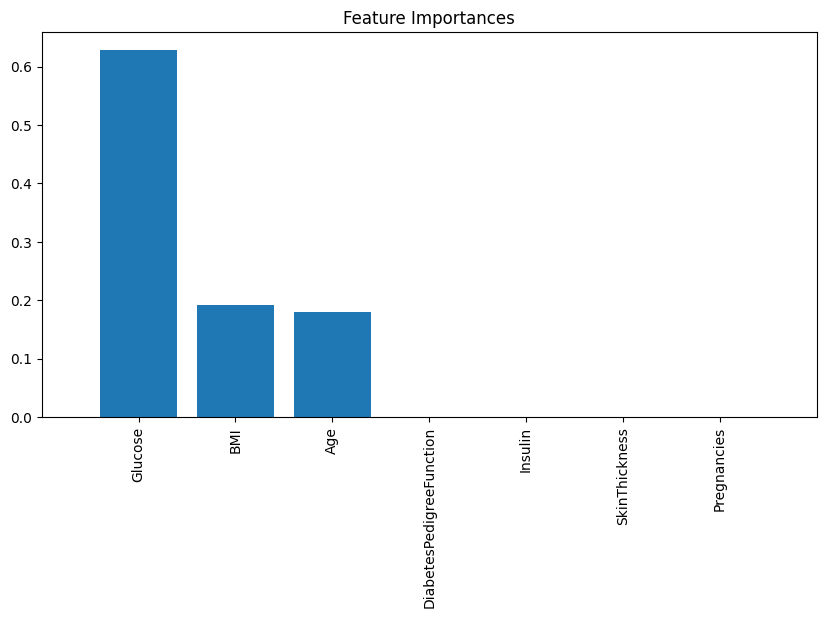

In [ ]:
# add your code here
model = DecisionTreeClassifier(max_depth = 2)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

#  Classification Report
print('Accuracy', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (10, 5))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align = "center")
plt.xticks(range(X_train.shape[1]), diabetes_features.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()



# Assessment of Decision Tree Classifier Model:
To predict diabetes outcomes, we used a Decision Tree classifier with a maximum depth of 2. With an accuracy rate of 77.27%, the model demonstrated good overall performance. The model had a recall of 0.88 for class 0 patients (those without diabetes) and 0.58 for class 1 patients (those with diabetes), with a precision of 0.79 for both classes, per the classification report. This produced a weighted average F1-score of 0.77, which demonstrated how well the model predicted non-diabetic instances. On the other hand, the reduced recall for individuals with diabetes implies that the model may not be able to identify all real positive cases of diabetes. The difference in recall scores between class 0 and class 1 emphasizes the need for more sophisticated techniques or parameter adjustments to attain a better balance and enhance the model's capacity to identify diabetes patients. Adjusting the maximum depth or investigating ensemble approaches are two further model improvement strategies that could improve the predicted accuracy and guarantee a more equal recall rate for both classes.

# Graph:
With an importance score just above 0.6, the Decision Tree model's feature importance graph shows that glucose is the most important predictor of diabetes. This great significance makes sense because one of the main signs of diabetes is elevated glucose levels. With an importance value of about 0.2, BMI is the second most significant feature, indicating its status as a well-known risk factor for diabetes. Since the risk of diabetes rises with age, age also has a noteworthy significance score—slightly less than 0.2—indicating its relevance in the model. In this specific Decision Tree with a maximum depth of 2, other features like DiabetesPedigreeFunction, Insulin, SkinThickness, and Pregnancies have a relevance score of 0, indicating that they did not significantly contribute to the model's predictions. This shows that these features were not used in this particular model design, but it does not mean that these features are unimportant for diabetes prediction in general. Future model advancements, such deepening the tree or utilizing more complex models that utilize the entire set of features, can be guided by this realization.

#**Cross-Validation LR:**
Using 5-fold cross-validation on the training set of data, we developed a Logistic Regression model for predicting diabetes outcomes. A reliable technique for evaluating the model's performance is cross-validation, which involves dividing the dataset into five subsets, training the model on four of them, and verifying it on the fifth. Each of the five iterations of this approach serves as the validation set once.

In [ ]:
# Create a Logistic Regression model
model = LogisticRegression()

# Perform 5-fold cross-validation
scores = cross_val_score(model, X_train, y_train, cv=5)

# Calculate the average cross-validation score
average_score = scores.mean()

# Print the average cross-validation score
print(f"Average Cross-Validation Score: {average_score}")

Average Cross-Validation Score: 0.7638811142209783


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

#Assessment of Cross-Validation LR Model:
Attaining an average cross-validation score of 0.764, the Logistic Regression model accurately predicts the outcome for 76.4% of the cases, on average, across various subsets of the training data. Based on this score, the model appears to have good data generalization skills. The results show that the model is well-balanced and not noticeably overfitting or underfitting when the cross-validation score is compared with the training and test accuracy. The model's predictive abilities can be trusted because of its consistent performance over folds and the similarity between test and training accuracy. Although the model works well, it might be more accurate with additional parameter adjustments, such as changing the regularization factor. Based on the available dataset, the Logistic Regression model is a good option overall for predicting diabetes outcomes.

#**AdaBoost Classifier Model:**

In [ ]:
model = AdaBoostClassifier(n_estimators = 100, algorithm = 'SAMME', random_state = 0)
model.fit(X_train,y_train)

predictions = model.predict(X_test)

#  Classification Report
print('Accuracy', accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy 0.7402597402597403
              precision    recall  f1-score   support

           0       0.79      0.81      0.80        99
           1       0.64      0.62      0.63        55

    accuracy                           0.74       154
   macro avg       0.72      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



#Assessment of AdaBoost Classifier Model:
We used the SAMME algorithm with 100 estimators to create an AdaBoost classifier to predict diabetes outcomes. The accuracy of the model was 74.03%. An extensive study of the model's performance in both classes is included in the classification report. The model produced an F1-score of 0.80, a recall of 0.81, and a precision of 0.79 for class 0 (non-diabetic cases). With 81% of true non-diabetic cases properly detected and 79% of predicted non-diabetic cases being true positives, this suggests that the model is highly good at identifying non-diabetic persons. The model performed worse for class 1 (diabetic cases), with an F1-score of 0.63, a precision of 0.64, and a recall of 0.62. This implies that although the model is able to detect cases of diabetes, it is not as accurate and fails to detect a significant number of real-world cases of diabetes. The model's balanced performance in both classes is indicated by the overall weighted average F1-score of 0.74. The model struggles with diabetic instances, although doing well for non-diabetic cases, as shown by the decreased precision and recall for class 1. This discrepancy suggests that in order to improve the prediction of diabetes cases and get a more balanced performance, additional refinement is necessary, which may involve adjusting the model's parameters or investigating new features.

# **Part 3: Ablation Testing**

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy

# Let's run ablation tests on our best model
# You could choose any model to do this test
best_model = DecisionTreeClassifier(max_depth = 2)

feature_names = diabetes_features.columns

# Let's maintain an accuracy dictionary
# We first compute the accuracy without ablation using K-fold cross validation

cv_scores = cross_val_score(best_model, X_train, y_train, cv=5, n_jobs=4)
average_cv_score_with_all_features = cv_scores.mean()

accuracy_drop_log = {"No ablation":0}

for i in range(len(feature_names)):
    # we are going to drop one feature at a time
    feature_name = feature_names[i]
    print (f"Removing feature {feature_name}")

    # Remmeber? We have the train + valid data in the above section?
    # We just remove the feature by not selecting the column from the index i

    x_ablated = numpy.delete(X_train,i,axis=1) # axis = 1 means columns

    cv_scores = cross_val_score(best_model,x_ablated,y_train, cv=5, n_jobs=4)
    average_cv_score = cv_scores.mean()
    print (f"Mean cross validation accuracy = {average_cv_score}")
    accuracy_drop_log[feature_name] = average_cv_score_with_all_features-average_cv_score

Removing feature Pregnancies
Mean cross validation accuracy = 0.7557377049180328
Removing feature Glucose
Mean cross validation accuracy = 0.7036118885779021
Removing feature SkinThickness
Mean cross validation accuracy = 0.7557377049180328
Removing feature Insulin
Mean cross validation accuracy = 0.7573637211781954
Removing feature BMI
Mean cross validation accuracy = 0.724776755964281
Removing feature DiabetesPedigreeFunction
Mean cross validation accuracy = 0.7557377049180328
Removing feature Age
Mean cross validation accuracy = 0.7557377049180328


#Assessment of Ablation Testing:
Using our best-performing model, a Decision Tree classifier with a maximum depth of 2, we performed ablation testing to evaluate the importance of each feature in predicting diabetes outcomes. In ablation testing, every feature in the model is methodically removed, and the effect on performance is evaluated. This technique aids in determining which characteristics are essential for precise forecasting. 5-fold cross-validation was used to assess how each feature's removal affected the model's functionality. Its crucial importance in the model's predictions is highlighted by the results, which demonstrated that eliminating "Glucose" caused a considerable decline in accuracy from 0.7557 to 0.7036. Its significance was further demonstrated by the fact that the absence of "BMI" caused the accuracy to drop to 0.7248. Both glucose and BMI are critical parameters for accurate diabetes predicting, as these results demonstrate. In order to create a more targeted and effective model, ablation testing also aids in the identification of less important aspects. We can simplify the model and possibly increase its capacity for generalization by removing elements that have no effect on performance. In order to accurately forecast diabetes, this study shows that glucose and BMI are essential. This information will direct future efforts in feature selection and model optimization. By prioritizing the most significant attributes, this method improves the predictive model's overall efficacy and dependability.

# **Part 4: Conclusion and Observations**

Using a variety of predictive algorithms generated from publicly available medical and demographic data, we examined the impact of body mass index (BMI), insulin, and glucose levels on diabetes outcomes in this study. Our goal was to find a financially sound approach to estimate the risk of diabetes. The Decision Tree classifier with a maximum depth of 2 was the most effective, achieving an accuracy of 77.27%. While it excelled at predicting non-diabetic cases, it struggled with identifying diabetic patients, highlighting the challenge of balancing sensitivity and specificity in medical diagnostics. The ablation study was essential in determining the importance of each feature in the model's predictive ability. Removing BMI and glucose significantly reduced accuracy, underscoring their critical role. These findings support the hypothesis that higher BMI and glucose levels are directly correlated with an increased risk of developing diabetes. The superior performance of the models in predicting non-diabetic patients could be due to the complexity of diabetes or the dataset's class imbalance. Traditional models like Logistic Regression and K-Nearest Neighbors provided foundational insights, while more sophisticated techniques like the Decision Tree and AdaBoost offered enhanced predictive capabilities. The ROC curve for the Logistic Regression model, with an AUC of 0.81, demonstrated a strong ability to distinguish between diabetic and non-diabetic cases, although further tuning is needed to improve recall and precision for diabetic subjects. The study's findings have significant implications for public health, particularly in areas with limited access to medical diagnostics. The Decision Tree model, leveraging easily obtainable data points like BMI and glucose levels, presents a viable method for early diabetes screening. This approach can empower individuals to manage their health proactively, potentially improving outcomes and reducing healthcare costs. Future research should focus on incorporating more relevant features and exploring advanced machine learning methods to develop more accurate and balanced predictive models. In conclusion, the research validates the hypothesis that higher BMI and glucose levels are crucial in predicting the likelihood of developing diabetes. Supported by feature importance analysis and robust performance metrics, the Decision Tree model offers a promising path toward creating accessible and efficient diabetes screening tools. By prioritizing the most significant predictors and iteratively refining the models, we can improve diagnostic accuracy, enhance public health outcomes, and reduce the burden on healthcare systems.